In [76]:
# import TensorFlow as TF
import pandas as pd
import math
import matplotlib.pylab as plt
import numpy as np
import statistics
from datetime import datetime

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error


In [77]:

df = pd.read_csv('data.csv')
data_top = df.head()
copy = df.copy() 

# 1 - Remove rows where the target column (Scope1) is NaN.

copy = copy[copy['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].notna()] # drop all rows with NaN in target column

copy = copy.reset_index() 



# 2 - Replace all NaN from the attribute columns and replace for mean of that column

#copy = copy.fillna(copy.mean())
#col_names = copy.columns
#sub2[col_names].fillna((sub2[col_names].mean()), inplace=True)

# 3 - Group rows by organization ID

# org_ids = list(copy['GTAP country'])
# list_set = set(org_ids)
# unique = list(list_set)

# copy = copy.groupby(['GTAP country'])

# dictionary = {} 

# for item in unique:
#     df_id = copy.get_group(item)
#     dictionary[item] = df_id


def create_dict(target_var, df): 
    org_ids = list(df[target_var]) 
    list_set = set(org_ids) # get unique elements
    unique = list(list_set) # place them in a list 

    df = df.groupby([target_var]) 

    dictionary = {} 

    for item in unique:
        df_id = df.get_group(item)
        dictionary[item] = df_id
    
    return dictionary
    

# dictionaries per target variable:

GTAP_sector_dict = create_dict('GTAP sector', copy)

GTAP_country_dict = create_dict('GTAP country', copy)



key_list = list(GTAP_sector_dict.keys())

print(key_list)

#print(GTAP_sector_dict)

# in the dictionary, we want to replace all the NaN of the values for the means of those columns.


# # check missing values >> columns with lots of missing values are not useful. 
# missing_values_df = copy.isnull().sum().sort_values(ascending=False).head()
# print(missing_values_df)

# # replace NaN in column for mean of column with Imputer 
# imp = SimpleImputer(missing_values='NaN', strategy='mean')
# imp = imp.fit(copy)



#print(replace_NaN(GTAP_sector_dict))    



['Recreational and other services', 'Air transport', 'Electricity', 'Null', 'Beverages and tobacco products', 'Water transport', 'Vegetables, fruit, nuts', 'None', 'Fishing', 'Crops nec', 'Education', 'Textiles', 'Food products nec', 'Machinery and equipment nec', 'Oil', 'Water', 'Human health and social work activities', 'Animal products nec', 'Transport equipment nec', 'Metal products', 'Manufactures nec', 'Trade', 'Wheat', 'Forestry', 'Construction', 'Processed rice', 'Wood products', 'Financial services nec', 'Paper products, publishing', 'Warehousing and support activities', 'Business services nec', 'Rubber and plastic products', 'Insurance', 'Wearing apparel', 'Accommodation, Food and service activities', 'Mineral products nec', 'Real estate activities', 'Basic pharmaceutical products', 'Computer, electronic and optical products', 'Chemical products', 'Motor vehicles and parts', 'Sugar cane, sugar beet', 'Transport nec', 'Metals nec', 'Petroleum, coal products', 'Gas', 'Coal', 'F

In [78]:
for col in df.columns:
    print(col)

organization_id
StatementDetails.FinancialPeriodEndDate
StatementDetails.FinancialPeriodFiscalYear
StatementDetails.FinancialPeriodIsIncomplete
StatementDetails.EsgOrAtdIndicator
EmissionDataPoints.AccidentalSpills
EmissionDataPoints.AnalyticCO2EstimationMethod
EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal
EmissionDataPoints.BiodiversityImpactReduction
EmissionDataPoints.CarbonOffsetsCredits
EmissionDataPoints.CementCO2EquivalentsEmission
EmissionDataPoints.ClimateChangeCommercialRisksOpportunities
EmissionDataPoints.CO2EquivalentsEmissionDirectScope1
EmissionDataPoints.CO2EquivalentsEmissionIndirectScope3
EmissionDataPoints.CO2EquivalentsEmissionIndirectScope2
EmissionDataPoints.CO2EquivalentsEmissionTotal
EmissionDataPoints.EmissionReductionTargetPercentage
EmissionDataPoints.EmissionReductionTargetYear
EmissionDataPoints.EmissionsTrading
EmissionDataPoints.EmsCertifiedPercent
EmissionDataPoints.EnvironmentalExpenditures
EmissionDataPoints.EnvironmentalInvestmentsIn

column_name        EmissionDataPoints.AnalyticEstimatesCO2Equival...
percent_missing                                            36.688228
Name: EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal, dtype: object
column_name        EmissionDataPoints.CO2EquivalentsEmissionTotal
percent_missing                                         68.512254
Name: EmissionDataPoints.CO2EquivalentsEmissionTotal, dtype: object
column_name        EmissionDataPoints.CO2EquivalentsEmissionDirec...
percent_missing                                            75.188416
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: object
column_name        EmissionIndicators.TotalCO2EquivalentsEmission...
percent_missing                                            66.379839
Name: EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues, dtype: object


In [3]:
# function for filling NaN's (with mean)
def fill_nan(df, column_name):
    mean_value=df[column_name].mean()
    df[column_name].fillna(value=mean_value, inplace=True)
    return df


In [53]:
# copy.groupby("organization_id")['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].plot(x='StatementDetails.FinancialPeriodFiscalYear',y='EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')
# .mean()


# org_dict = create_dict('organization_id', copy)



# print(list(GTAP_country_dict))
# print(org_dict.type)
# print(list(copy.columns.values))



SyntaxError: invalid syntax (2740612792.py, line 2)

In [5]:
# regr = linear_model.LinearRegression()
# regr.fit(diabetes_X_train, diabetes_y_train)
# diabetes_y_pred = regr.predict(diabetes_X_test)

# polynomial regression 

dict_id = create_dict('GTAP sector', copy)
air = dict_id['Air transport']
# print(air)
Y = air['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']
X = air.loc[:, ['StatementDetails.FinancialPeriodFiscalYear', 'EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues', 'EmissionIndicators.NOxEmissionsToRevenues']]


# filling missing values with mean 
X = fill_nan(X, 'EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues')
X = fill_nan(X, 'EmissionIndicators.NOxEmissionsToRevenues')
print(X)
X = np.array(X)
# X = X.reshape(-1,1) # alleen voor 1 input variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,Y_train)
predictions = polyreg.predict(X_test)

# print("Coefficients: \n", polyreg.coef_)
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

print(Y.mean())


       StatementDetails.FinancialPeriodFiscalYear  \
198                                          2013   
336                                          2011   
427                                          2014   
455                                          2017   
488                                          2009   
...                                           ...   
24678                                        2015   
24679                                        2010   
24770                                        2019   
24935                                        2012   
25028                                        2014   

       EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues  \
198                                           860.007572           
336                                          1155.559121           
427                                          1187.299487           
455                                           867.054573           
488                    

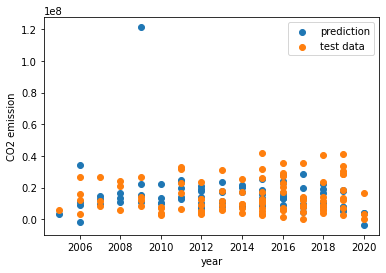

In [6]:
plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

/Users/raoulritter/miniforge3/envs/Jupyter_M1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


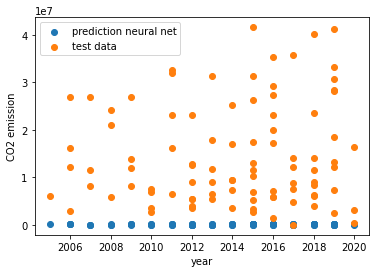

In [7]:
# neural networks

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
pred_nn = regr.predict(X_test)
regr.score(X_test, Y_test)

plt.scatter(X_test[:, 0], pred_nn, label='prediction neural net')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()



Mean absolute error: 10658660.44
Coefficient of determination: -0.49


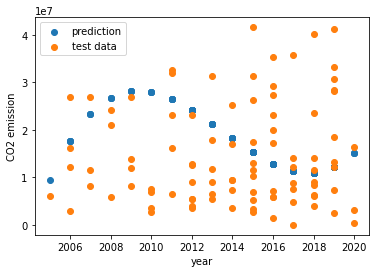

In [8]:
# making future predictions


X = air.loc[:, ['StatementDetails.FinancialPeriodFiscalYear']]

X = np.array(X)
# X = X.reshape(-1,1) # alleen voor 1 input variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,Y_train)
predictions = polyreg.predict(X_test)
print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

In [9]:
print(len(X_test))
print(X_test)

X_test[30][0] = 2021
    
print(X_test)

94
[[2010]
 [2018]
 [2016]
 [2016]
 [2017]
 [2011]
 [2015]
 [2007]
 [2012]
 [2008]
 [2015]
 [2018]
 [2020]
 [2018]
 [2011]
 [2015]
 [2014]
 [2012]
 [2015]
 [2006]
 [2019]
 [2016]
 [2013]
 [2016]
 [2010]
 [2012]
 [2016]
 [2009]
 [2015]
 [2016]
 [2019]
 [2020]
 [2017]
 [2016]
 [2018]
 [2015]
 [2016]
 [2017]
 [2018]
 [2015]
 [2006]
 [2019]
 [2018]
 [2010]
 [2012]
 [2016]
 [2011]
 [2011]
 [2017]
 [2009]
 [2017]
 [2005]
 [2012]
 [2008]
 [2013]
 [2019]
 [2012]
 [2014]
 [2015]
 [2006]
 [2014]
 [2018]
 [2017]
 [2009]
 [2019]
 [2014]
 [2007]
 [2019]
 [2018]
 [2012]
 [2010]
 [2019]
 [2014]
 [2009]
 [2015]
 [2014]
 [2019]
 [2017]
 [2006]
 [2007]
 [2011]
 [2013]
 [2013]
 [2016]
 [2015]
 [2019]
 [2019]
 [2015]
 [2008]
 [2018]
 [2020]
 [2013]
 [2013]
 [2012]]
[[2010]
 [2018]
 [2016]
 [2016]
 [2017]
 [2011]
 [2015]
 [2007]
 [2012]
 [2008]
 [2015]
 [2018]
 [2020]
 [2018]
 [2011]
 [2015]
 [2014]
 [2012]
 [2015]
 [2006]
 [2019]
 [2016]
 [2013]
 [2016]
 [2010]
 [2012]
 [2016]
 [2009]
 [2015]
 [2016]
 [20

In [10]:
predictions = polyreg.predict(X_test)

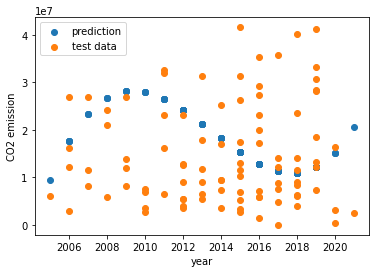

In [11]:
plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

In [80]:
# air['StatementDetails.FinancialPeriodEndDate'] = air['StatementDetails.FinancialPeriodEndDate'].map(lambda x: x.rstrip('T00:00:00.000Z'))
# air['StatementDetails.FinancialPeriodEndDate'] = air['StatementDetails.FinancialPeriodEndDate'].map(lambda x: x.replace('-', '/'))
# air['StatementDetails.FinancialPeriodEndDate'] = air['StatementDetails.FinancialPeriodEndDate'].map(lambda x: datetime.strptime(x, '%Y/%m/%d'))


air['StatementDetails.FinancialPeriodEndDate'] = pd.to_datetime(air['StatementDetails.FinancialPeriodEndDate'])

air['StatementDetails.FinancialPeriodEndDate'] = air['StatementDetails.FinancialPeriodEndDate'].dt.date

air = air.sort_values(by='StatementDetails.FinancialPeriodEndDate')

print(air['StatementDetails.FinancialPeriodEndDate'])




0      2004-03-31
1      2004-12-31
2      2005-03-31
3      2005-03-31
4      2005-03-31
          ...    
458    2020-06-30
459    2020-09-30
460    2020-09-30
461    2020-10-31
462    2020-12-31
Name: StatementDetails.FinancialPeriodEndDate, Length: 463, dtype: object


In [81]:
def ratio_nan(df, column_name):
    ratio = df[column_name].isnull().sum() / len(df)
    return ratio

def df_clean(df, column_name):
    df = df.reset_index(drop=True)
    for i in range(len(df[column_name])-3):
        if math.isnan(df.at[i, column_name]):
            if math.isnan(df.at[i+1,column_name]):
                if math.isnan(df.at[i+2, column_name]):
                    df.drop([i, i+1, i+2])
                else:
                    if i == 0:
                        df.at[0,column_name] = df.at[i+2, column_name]
                    else:
                        mean = (df.at[i-1,column_name]+df.at[i+2,column_name])/2
                        df.at[i,column_name] = mean
                        df.at[i+1,column_name] = mean
            else:
                if i == 0:
                    df.at[0,column_name] = df.at[i+1,column_name]
                else:
                    mean = (df.at[i-1,column_name] + df.at[i+1, column_name])/2
                    df[column_name][i] = mean
    df = df[df[column_name].notna()]
    return df

def dict_clean_better(dictionary, column_name, ratio):
    dict_clean = {}
    for key in dictionary:
        ratio_key = ratio_nan(dictionary[key], column_name)
        if ratio_key <= ratio:
            dict_clean[key] = df_clean(dictionary[key], column_name)
        else:
            df_key = dictionary[key]
            df_key = df_key[df_key[column_name].notna()]
            dict_clean[key] = df_key
    return dict_clean

def manage_outliers(df, column_name, d_max):
    df = df.reset_index(drop=True)    
    for i in range(len(df[column_name])-1):
        x = df.at[i, column_name]
        x_hat = df[column_name].mean()
        stddv = statistics.stdev(df[column_name])
        d_x = (x - x_hat)/stddv
        if d_x > d_max:
            df.drop(i)
    return df




463
0              NaN
1              NaN
2       333.280953
3              NaN
4              NaN
          ...     
458     957.097090
459            NaN
460            NaN
461     865.346999
462    1146.819018
Name: CO2toRevenue, Length: 463, dtype: float64
Mean absolute error: 11220687.87
Coefficient of determination: 0.01


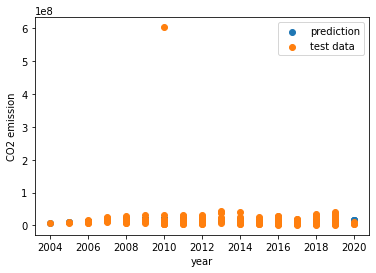

In [87]:
air = df_clean(air, 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')
print(len(air))
air = manage_outliers(air, 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 0.5)
air['CO2toRevenue'] = air['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']*(air['EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues']/air['EmissionDataPoints.CO2EquivalentsEmissionTotal'])

print(air['CO2toRevenue'])

X = air.loc[:, ['StatementDetails.FinancialPeriodFiscalYear']]
Y = air['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']
X = np.array(X)
# X = X.reshape(-1,1) # alleen voor 1 input variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
degree = 4
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,Y_train)
predictions = polyreg.predict(X_test)
print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')


# data = (X_test[:, 0], Y_test)
# fig1, ax1 = plt.subplots()
# ax1.set_title('Test Box')
# ax1.boxplot(data, notch=True)

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

In [93]:
percent_missing = air.isnull().sum() * 100 / len(air)
missing_value_df = pd.DataFrame({'column_name': air.columns,
                                 'percent_missing': percent_missing})
# And if you want the missing percentages sorted, follow the above with:

# missing_value_df.sort_values('percent_missing', inplace=True)

# missing_value_df['EmissionDataPoints.AnalyticCO2EstimationMethod']

# EmissionDataPoints.AnalyticCO2EstimationMethod


print(missing_value_df.loc['EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal'])


print(missing_value_df.loc['EmissionDataPoints.CO2EquivalentsEmissionTotal'])




print(missing_value_df.loc['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])
print(missing_value_df.loc['EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues'])
print(missing_value_df.loc['CO2toRevenue'])



# EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues * EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues
       
#Split per sector

#Add column to DF with multiply

# EmissionDataPoints.CO2EquivalentsEmissionTotal



#Adds column to df which contains the scaled Emissions based on sector (Assuming sector input) 
def scale_emissions(df):
    df['CO2toRevenue'] = df['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']*(df['EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues']/df['EmissionDataPoints.CO2EquivalentsEmissionTotal'])
    return df

#Takes threshold in order to determine if you want to use sector or org_id

def sector_or_orgid(orgid, df, threshold = 10):
#     len(df[df['organization_id']==orgid])
    return len(df[df['organization_id']==orgid]) >= threshold

print(sector_or_orgid(2964,copy)) 




column_name        EmissionDataPoints.AnalyticEstimatesCO2Equival...
percent_missing                                            12.742981
Name: EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal, dtype: object
column_name        EmissionDataPoints.CO2EquivalentsEmissionTotal
percent_missing                                         33.477322
Name: EmissionDataPoints.CO2EquivalentsEmissionTotal, dtype: object
column_name        EmissionDataPoints.CO2EquivalentsEmissionDirec...
percent_missing                                                  0.0
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: object
column_name        EmissionIndicators.TotalCO2EquivalentsEmission...
percent_missing                                            32.397408
Name: EmissionIndicators.TotalCO2EquivalentsEmissionsToRevenues, dtype: object
column_name        CO2toRevenue
percent_missing       33.477322
Name: CO2toRevenue, dtype: object
True


In [33]:

df = pd.read_csv('data.csv')
data_top = df.head()
copy = df.copy() 

# 1 - Remove rows where the target column (Scope1) is NaN.

#copy = copy[copy['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].notna()] # drop all rows with NaN in target column
#copy = copy.reset_index() 

# 2 - Replace all NaN from the attribute columns and replace for mean of that column

# copy = copy.fillna(copy.mean())
# col_names = copy.columns
# sub2[col_names].fillna((sub2[col_names].mean()), inplace=True)

# create dictionary with 
def create_dict(target_var, df): 
    org_ids = list(df[target_var]) 
    list_set = set(org_ids) # get unique elements
    unique = list(list_set) # place them in a list 
    df = df.groupby([target_var]) 
    
    dictionary = {} 
    for item in unique:
        df_id = df.get_group(item)
        df_id["StatementDetails.FinancialPeriodEndDate"] = pd.to_datetime(df_id["StatementDetails.FinancialPeriodEndDate"])
        
        #df_id['StatementDetails.FinancialPeriodEndDate'] = df_id['StatementDetails.FinancialPeriodEndDate'].map(lambda x: x.rstrip('T00:00:00.000Z'))
        #df_id['StatementDetails.FinancialPeriodEndDate'] = df_id['StatementDetails.FinancialPeriodEndDate'].map(lambda x: x.replace('-', '/'))
        #df_id['StatementDetails.FinancialPeriodEndDate'] = df_id['StatementDetails.FinancialPeriodEndDate'].map(lambda x: datetime.strptime(x, '%Y/%m/%d'))
        
        df_id = df_id.sort_values(by="StatementDetails.FinancialPeriodEndDate")
        dictionary[item] = df_id
    
    return dictionary

dict_id = create_dict('organization_id', copy)
#print(dict_id[14346])

#print(copy.organzation_id)

#key_list = list(GTAP_sector_dict.keys())

#print(key_list)

#print(GTAP_sector_dict)

# in the dictionary, we want to replace all the NaN of the values for the means of those columns.


# # check missing values >> columns with lots of missing values are not useful. 
# missing_values_df = copy.isnull().sum().sort_values(ascending=False).head()
# print(missing_values_df)

# # replace NaN in column for mean of column with Imputer 
# imp = SimpleImputer(missing_values='NaN', strategy='mean')
# imp = imp.fit(copy)



#print(replace_NaN(GTAP_sector_dict))    



/var/folders/xr/5n5p0p5d4zjg8f57zwt16lyr0000gn/T/ipykernel_55942/83192679.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id["StatementDetails.FinancialPeriodEndDate"] = pd.to_datetime(df_id["StatementDetails.FinancialPeriodEndDate"])


In [15]:
# function for filling NaN's
def fill_nan(df, column_name):
    mean_value=df[column_name].mean()
    df[column_name].fillna(value=mean_value, inplace=True)
    return df

# function for determining percentage NaN
def ratio_nan(df, column_name):
    ratio = df[column_name].isnull().sum() / len(df)
    return ratio

# function to loop over org_ids and creat df with ratio's nan in column
def dict_ratios(dictionary, column_name):
    dict_ratios = {}
    for key in dictionary:
        ratio_key = ratio_nan(dictionary[key], column_name)
        dict_ratios[key] = ratio_key
    return dict_ratios

#print(np.array(list(dict_ratios(dict_id, 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1').values())).mean())
#print(dict_ratios(dict_id, 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'))

def df_clean(df, column_name):
    df = df.reset_index(drop=True)
    for i in range(len(df[column_name])-3):
        if math.isnan(df.at[i, column_name]):
            if math.isnan(df.at[i+1,column_name]):
                if math.isnan(df.at[i+2, column_name]):
                    df.drop([i, i+1, i+2])
                else:
                    if i == 0:
                        df.at[0,column_name] = df.at[i+2, column_name]
                    else:
                        mean = (df.at[i-1,column_name]+df.at[i+2,column_name])/2
                        df.at[i,column_name] = mean
                        df.at[i+1,column_name] = mean
            else:
                if i == 0:
                    df.at[0,column_name] = df.at[i+1,column_name]
                else:
                    mean = (df.at[i-1,column_name] + df.at[i+1, column_name])/2
                    df[column_name][i] = mean
    return df

def dict_clean_better(dictionary, column_name, ratio):
    dict_clean = {}
    for key in dictionary:
        ratio_key = ratio_nan(dictionary[key], column_name)
        if ratio_key <= ratio:
            dict_clean[key] = df_clean(dictionary[key], column_name)
        else:
            df_key = dictionary[key]
            df_key = df_key[df_key[column_name].notna()]
            dict_clean[key] = df_key
    return dict_clean

def dict_clean_mean(dictionary, column_name, ratio):
    dict_clean = {}
    for key in dictionary:
        ratio_key = ratio_nan(dictionary[key], column_name)
        if ratio_key <= ratio:
            dict_clean[key] = fill_nan(dictionary[key], column_name)
        else:
            df_key = dictionary[key]
            df_key = df_key[df_key[column_name].notna()]
            dict_clean[key] = df_key
    return dict_clean


dict_nan = dict_clean_better(dict_id, 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 0.2)


# print(ratio_nan(dict_id[6230], 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'))

# df_6230 = dict_id[6230]
# df_clean_6230 = dict_nan[6230]

df_72 = dict_id[72]
df_clean_72 = dict_nan[72]

print(df_72['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])
print(df_clean_72['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])




/var/folders/xr/5n5p0p5d4zjg8f57zwt16lyr0000gn/T/ipykernel_55942/2541548572.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = mean


57574        NaN
25387    39982.0
20060    42051.0
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64
25387    39982.0
20060    42051.0
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64


In [16]:
#copy.groupby("organization_id")['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].plot(x='StatementDetails.FinancialPeriodFiscalYear',y='EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')
# .mean()

#print(list(copy.columns))

def find_correlation(df, target_value, column_name):
    # way to determine if columns have correlation
    df_target = df[target_value]
    df_corr = df[column_name]
    corr = df.corrwith(df_target)
    return corr

#print(find_correlation(dict_id[6230], 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 'EmissionDataPoints.NonHazardousWaste'))



In [17]:
from datetime import datetime

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

dict_id = create_dict('GTAP sector', copy)
air = dict_id['Air transport']
# print(air)
Y = air['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']
X = air.loc[:, ['StatementDetails.FinancialPeriodFiscalYear']]

X = np.array(X)
# X = X.reshape(-1,1) # alleen voor 1 input variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train,Y_train)
predictions = polyreg.predict(X_test)

# print("Coefficients: \n", polyreg.coef_)
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(Y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

plt.scatter(X_test[:, 0], predictions, label='prediction')
plt.scatter(X_test[:, 0], Y_test, label='test data')

plt.xlabel("year")
plt.ylabel("CO2 emission")
plt.legend()
plt.show()

/var/folders/xr/5n5p0p5d4zjg8f57zwt16lyr0000gn/T/ipykernel_55942/83192679.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id["StatementDetails.FinancialPeriodEndDate"] = pd.to_datetime(df_id["StatementDetails.FinancialPeriodEndDate"])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').